In [31]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [110]:
name_file = "exp_2_cluster_2_max.csv"
title = "Cluster 2 worse values"
data_folder = os.path.join(os.path.dirname(os.getcwd()), "survLime", "computed_weights_csv", "exp2")
file_path =  os.path.join(data_folder, name_file)


In [111]:
data = pd.read_csv(file_path)
data.head()

,one,two,three,four,five
0,-0.087981,0.009927,-0.000017,0.020502,-0.114207
1,-0.096351,-0.199930,-0.201560,0.007258,-0.261397
2,-0.139135,-0.019881,0.017855,-0.010036,-0.125846
3,-0.024421,-0.091879,-0.147517,0.120850,-0.339273
4,-0.030061,0.117022,-0.075631,0.150333,-0.104911


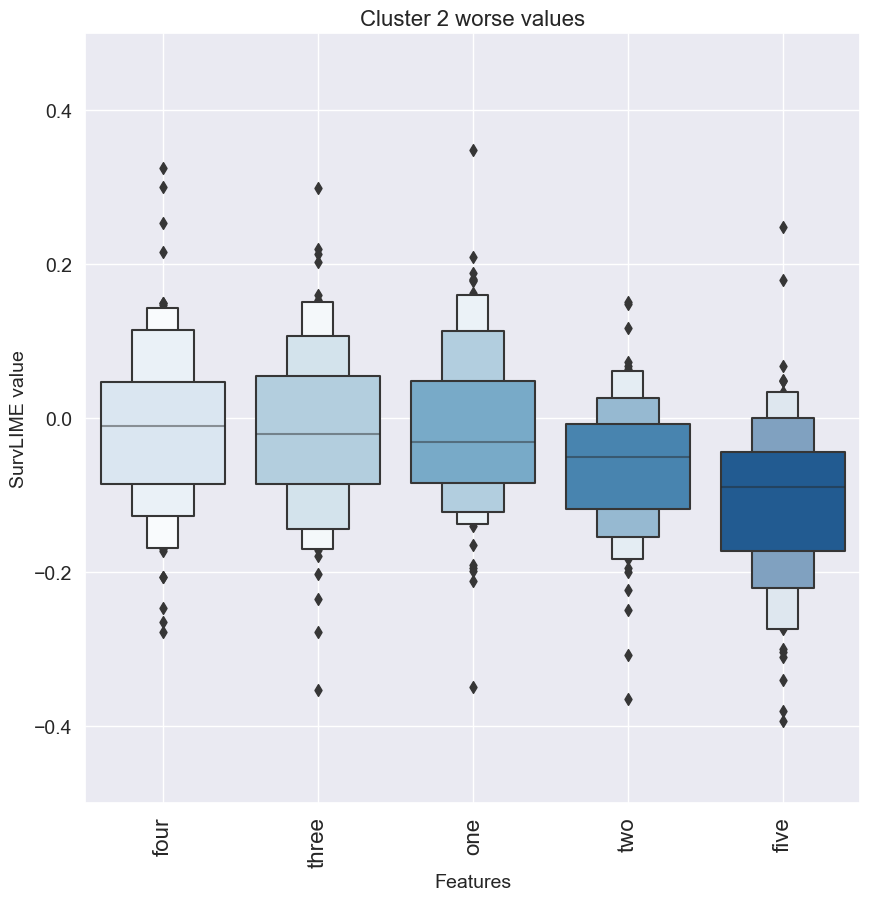

In [112]:
sns.set()
figsize = (10, 10)
median_up = {}
median_down = {}
threshold = 0
for (columnName, columnData) in data.items():
    median_value = np.median(columnData)
    if median_value > threshold:
        median_up[columnName] = median_value
    else:
        median_down[columnName] = median_value

median_up = dict(
    sorted(median_up.items(), key=lambda item: item[1], reverse=True)
)
median_down = dict(
    sorted(median_down.items(), key=lambda item: item[1], reverse=True)
)
pal_up = sns.color_palette("Reds_r", n_colors=len(median_up))
pal_down = sns.color_palette("Blues", n_colors=len(median_down))
colors_up = {key: val for key, val in zip(median_up.keys(), pal_up)}
colors_down = {key: val for key, val in zip(median_down.keys(), pal_down)}
custom_pal = {**colors_up, **colors_down}
data_reindex = data.reindex(columns=custom_pal.keys())
data_melt = pd.melt(data_reindex)

_, ax = plt.subplots(figsize=figsize)
ax.tick_params(labelrotation=90)
p = sns.boxenplot(
    x="variable",
    y="value",
    data=data_melt,
    palette=custom_pal,
    ax=ax,
)
ax.tick_params(labelrotation=90)
ax.set_ylim(-0.5, 0.5)
p.set_xlabel("Features", fontsize=14)
p.set_ylabel("SurvLIME value", fontsize=14)
p.yaxis.grid(True)
p.xaxis.grid(True)

p.set_title(title, fontsize=16)

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=14, rotation=0)

plt.show()